In [1]:
#Usaremos el cógido de Georg Boeing
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
font_family = 'Myriad Pro'
title_font = fm.FontProperties(family=font_family, style='normal', size=20, weight='normal', stretch='normal')

In [3]:
save_folder = 'imagenes2'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [4]:
# Se definen las condiciones iniciales (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# Definimos los parametros del sistema: sigma, rho y beta
sigma = 28.
rho   = 46.92
beta  = 4.

# Se definen los puntos de tiempo para resolver el sistema, posicionados entre los tiempos de inicio y final
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

In [5]:
# Se define el sistema de Lorenz
# x, y y z conforman el sistema, t es el tiempo, y sigma, rho y beta son los parametros del sistema
def lorenz_system(current_state, t):
    
    # posiciones de x, y, z en el espacio al punto de tiempo
    x, y, z = current_state
    
    # se definen tres ecuaciones diferenciales conocidas como las ecuaciones de Lorenz
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # devolver una lista de las ecuaciones que describen al sistema
    return [dx_dt, dy_dt, dz_dt]

In [6]:
# usar odeint() para resolver un sistema de ecuaciones diferenciales ordinarias
# los argumentos son
# 1, una funcion - calcula los derivados 
# 2, un vector de condicones iniciales para el sistema (es decir, las posiciones en el espacio de x,y,z)
# 3, a sequence of time points to solve for
# 3, una secuancia de puntos para resolver
# devolver un arreglo de x, y, y z matrices de valores para cada punto, con los valores iniciales en la primera ronda
xyz = odeint(lorenz_system, initial_state, time_points)

# extraer los arreglos individuales de x, y, y z de valores de la matriz de matrices
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


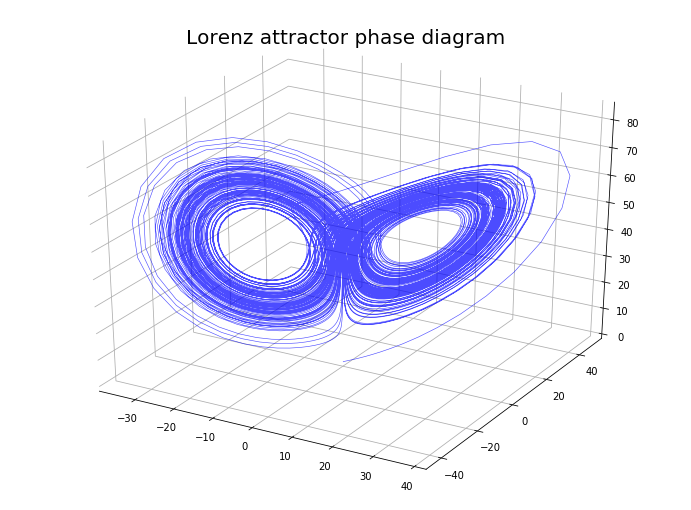

In [7]:
#graficar el atractor de lorenz en un espacio tridimensional 
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='b', alpha=0.7, linewidth=0.6)
ax.set_title('Lorenz attractor phase diagram', fontproperties=title_font)

fig.savefig('{}/lorenz-attractor-3d.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


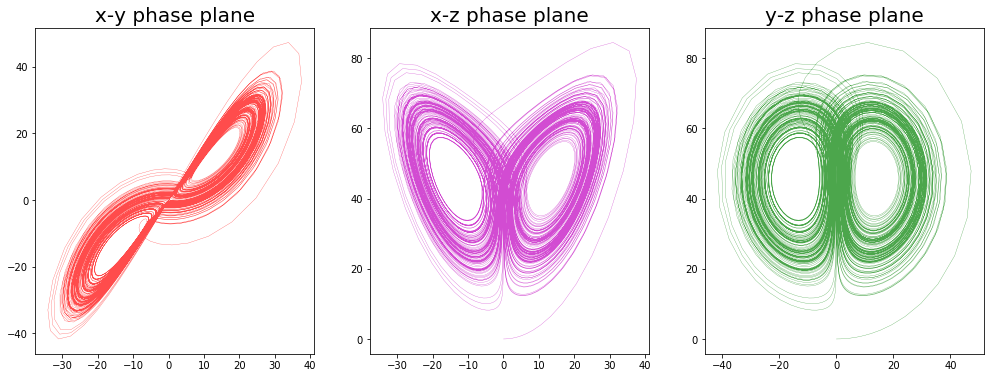

In [8]:
# now plot two-dimensional cuts of the three-dimensional phase space
# ahora graficamos cortes de la fase en el espacio tridimensional en dos dimensiones
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# plot the x values vs the y values
ax[0].plot(x, y, color='r', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane', fontproperties=title_font)

# plot the x values vs the z values
ax[1].plot(x, z, color='m', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane', fontproperties=title_font)

# plot the y values vs the z values
ax[2].plot(y, z, color='g', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane', fontproperties=title_font)

fig.savefig('{}/lorenz-attractor-phase-plane.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()